# Water Potability Dataset

# Performed by Piyush Borhade

Don't forget to follow me on [Medium](https://medium.com/@borhadepiyush) | [GitHub](https://github.com/PiyushBorhade) | [Linkedin](https://www.linkedin.com/in/piyush-borhade/) | [Kaggle](https://www.kaggle.com/piyushborhade) 😎

Analyzing the Fluidity of Safety:A Comprehensive Exploration of Water Potability

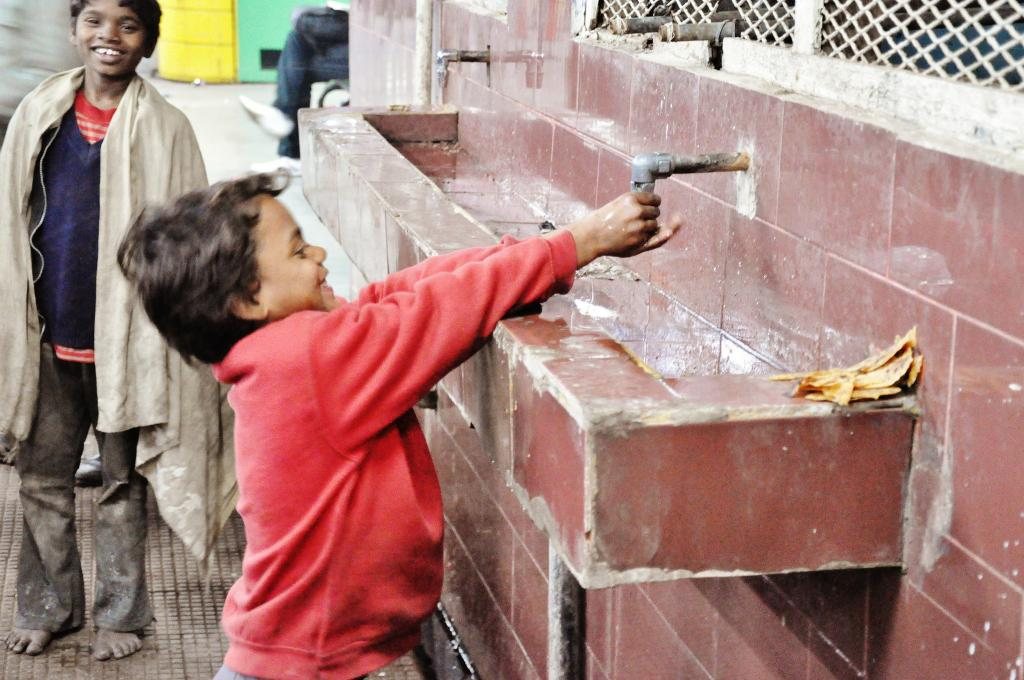

Importing required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore') 

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, f1_score

In [3]:
#pip install imbalanced-learn
!pip install --upgrade scikit-learn imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import imblearn
print(imblearn.__version__)

0.12.2


In [5]:
df = pd.read_csv('water_potability.csv');
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [6]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [7]:
df.shape

(3276, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [10]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Missing values found in 'ph', 'Sulfate', 'Trihalomethanes'. We need to handle it!

In [11]:
df = df.fillna(df.mean())

In [12]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [13]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [14]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


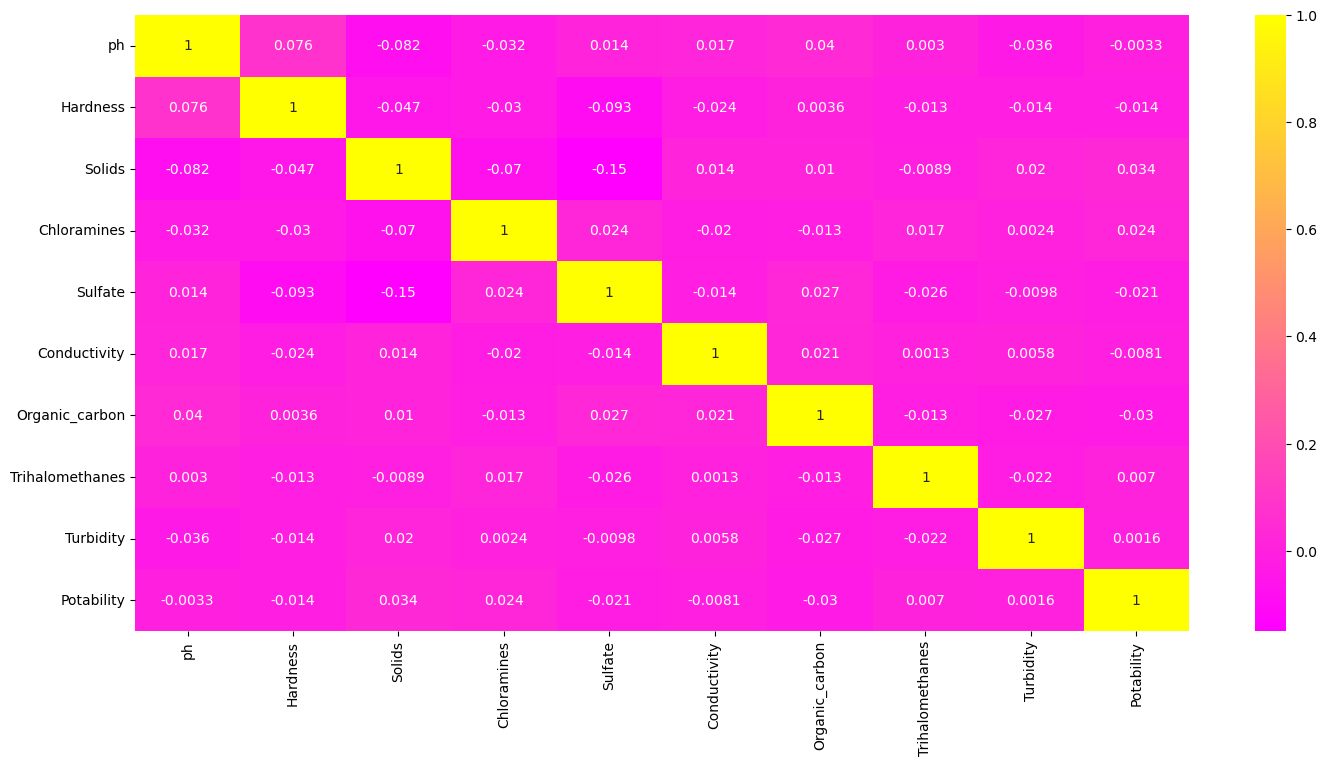

In [15]:
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(),annot=True,cmap="spring")
plt.show()

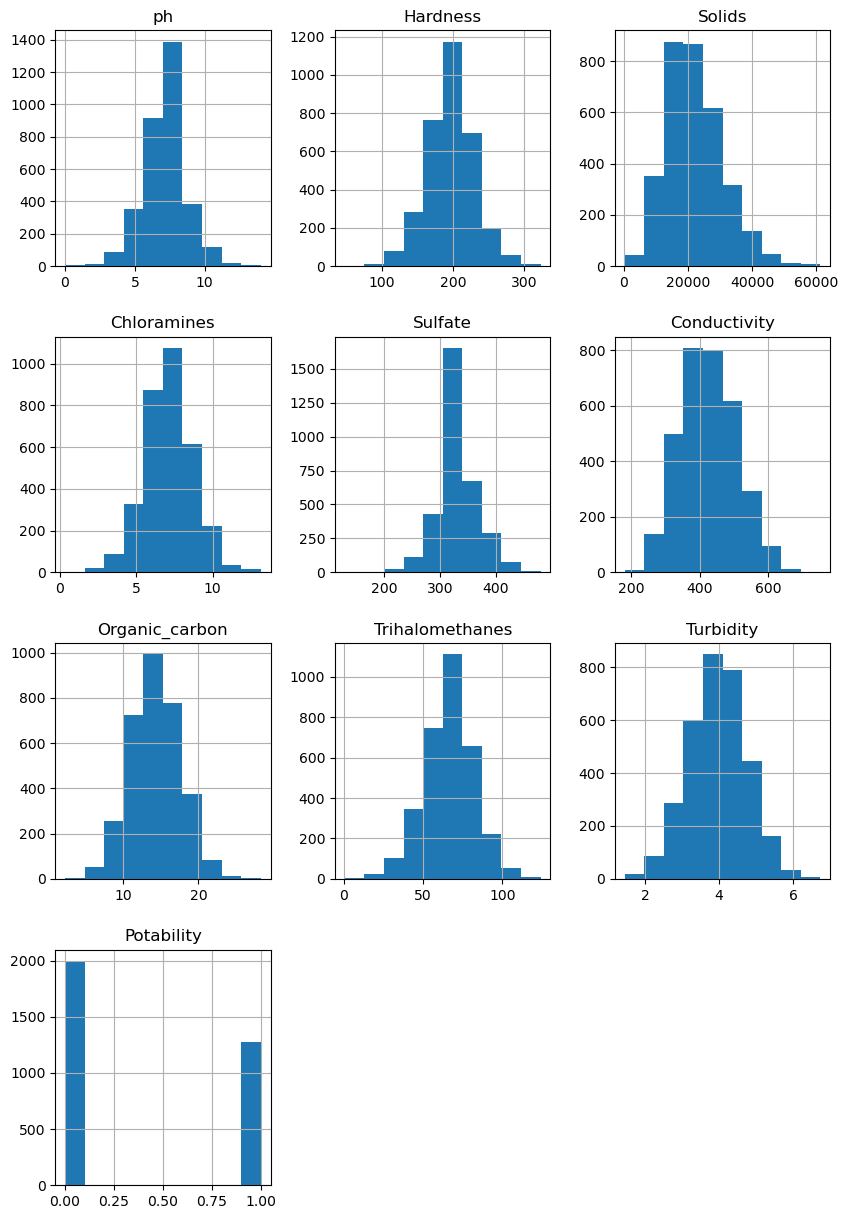

In [16]:
df.hist(figsize=(10,15))
plt.show()

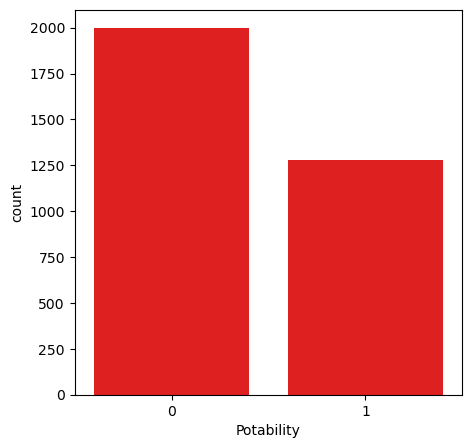

In [17]:
plt.figure(figsize=(5,5))
sns.countplot( x=df["Potability"], color="red")
plt.show()

In [18]:
X_old = df.drop(['Potability'], axis=1)

In [19]:
y_old = df['Potability']

In [20]:
smote = SMOTE(sampling_strategy={1: int((985 * 1/10) * 3 + 985) })
X, y = smote.fit_resample(X_old, y_old)

In [21]:
X.shape

(3278, 9)

In [22]:
y.shape

(3278,)

#  Cross-Validation

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [24]:
print(X_train.shape)

(2622, 9)


In [25]:
print(X_test.shape)

(656, 9)


# Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()

In [28]:
X_sc = sc.fit_transform(X)

In [29]:
X_sc

array([[-5.84761044e-05,  2.58959325e-01, -1.39873247e-01, ...,
        -1.18048176e+00,  1.30598913e+00, -1.28691842e+00],
       [-2.29007605e+00, -2.03647418e+00, -3.86433936e-01, ...,
         2.71005672e-01, -6.38986876e-01,  6.83859977e-01],
       [ 6.93014570e-01,  8.47384620e-01, -2.40468035e-01, ...,
         7.81609584e-01,  1.11658130e-03, -1.16797043e+00],
       ...,
       [ 5.40252444e-01, -3.87589362e-02, -5.26284697e-01, ...,
         5.61396442e-01,  7.79969430e-01, -2.12519134e+00],
       [ 2.37861872e-01, -7.07298340e-01,  7.64482002e-01, ...,
        -2.73627879e-01,  6.78710574e-01,  5.90488599e-01],
       [-4.62941543e-02,  1.41373990e+00,  4.70458604e-01, ...,
        -9.18025735e-01,  6.09073762e-01,  8.81121294e-01]])

# **Model Training**

**1: Logistic Regression**

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [33]:
#pred = lr.predict(X_test)
#print(classification_report(y_test, pred))

In [34]:
lr.coef_

array([[-1.52365304e-03,  4.76694123e-04,  7.49768782e-06,
         6.69231509e-03, -2.03245175e-03, -4.88756235e-05,
        -2.08688647e-02,  3.17929000e-03,  1.91526015e-03]])

In [35]:
lr.intercept_

array([-6.98123887e-05])

In [36]:
y_pred_lr = lr.predict(X_test)

In [37]:
result = pd.DataFrame({'Actual':y_test,'predicted':y_pred_lr})
print(result)

      Actual  predicted
983        0          0
564        0          0
2213       0          0
2779       1          0
1383       0          0
...      ...        ...
677        1          0
1872       0          0
1787       0          0
1891       1          0
560        0          0

[656 rows x 2 columns]


In [38]:
lr.score(X_test,y_test)

0.5777439024390244

In [39]:
accuracy_score(y_test,y_pred_lr) * 100

57.77439024390244

Logistic Regression gives only 58% accuracy!

**2: Support Vector Machine**

In [40]:
from sklearn.svm import SVC

In [41]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [42]:
y_pred_svm = lr.predict(X_test)

In [43]:
result = pd.DataFrame({'Actual':y_test,'predicted':y_pred_svm})
print(result)

      Actual  predicted
983        0          0
564        0          0
2213       0          0
2779       1          0
1383       0          0
...      ...        ...
677        1          0
1872       0          0
1787       0          0
1891       1          0
560        0          0

[656 rows x 2 columns]


In [44]:
svm.score(X_test,y_test)

0.5777439024390244

In [45]:
accuracy_score(y_test,y_pred_svm) * 100

57.77439024390244

SVM gives only 58% accuracy!

**3: Random Forest**

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
y_pred_rfc = rfc.predict(X_test)

In [49]:
result = pd.DataFrame({'Actual':y_test,'predicted':y_pred_rfc})
print(result)

      Actual  predicted
983        0          0
564        0          0
2213       0          0
2779       1          1
1383       0          0
...      ...        ...
677        1          0
1872       0          1
1787       0          0
1891       1          1
560        0          1

[656 rows x 2 columns]


In [50]:
rfc.score(X_test,y_test)

0.6310975609756098

In [51]:
accuracy_score(y_test,y_pred_rfc) * 100

63.109756097560975

Random Forest gives only 64% accuracy!

**4: KNN**

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [54]:
y_pred_knn = rfc.predict(X_test)

In [55]:
result = pd.DataFrame({'Actual':y_test,'predicted':y_pred_knn})
print(result)

      Actual  predicted
983        0          0
564        0          0
2213       0          0
2779       1          1
1383       0          0
...      ...        ...
677        1          0
1872       0          1
1787       0          0
1891       1          1
560        0          1

[656 rows x 2 columns]


In [56]:
knn.score(X_test,y_test)

0.5396341463414634

In [57]:
accuracy_score(y_test,y_pred_knn) * 100

63.109756097560975

KNN gives only 64% accuracy! 

**5: Gradient Boosting Classifier**

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
gb = GradientBoostingClassifier(n_estimators=500)

In [60]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=500)

In [61]:
y_pred_gb = gb.predict(X_test)

In [62]:
result = pd.DataFrame({'Actual':y_test,'predicted':y_pred_svm})
print(result)

      Actual  predicted
983        0          0
564        0          0
2213       0          0
2779       1          0
1383       0          0
...      ...        ...
677        1          0
1872       0          0
1787       0          0
1891       1          0
560        0          0

[656 rows x 2 columns]


In [63]:
gb.score(X_test,y_test)

0.6326219512195121

In [64]:
accuracy_score(y_test,y_pred_gb) * 100

63.262195121951216

Gradient Boosting gives us 63% of accuracy 

**6: Decision Tree Classifier**

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dtc = DecisionTreeClassifier()

In [67]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [68]:
dtc_pred = dtc.predict(X_test)

In [69]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65       379
           1       0.50      0.46      0.48       277

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.57      0.58      0.58       656



In [70]:
result = pd.DataFrame({'Actual':y_test,'predicted':dtc_pred})
print(result)

      Actual  predicted
983        0          1
564        0          1
2213       0          1
2779       1          1
1383       0          0
...      ...        ...
677        1          0
1872       0          1
1787       0          0
1891       1          1
560        0          1

[656 rows x 2 columns]


In [71]:
dtc.score(X_test,y_test)

0.5792682926829268

In [72]:
accuracy_score(y_test,dtc_pred) * 100

57.92682926829268

Decision Tree Classifer gives us 56% of accuracy

By using GridSearchCV to get best parameters

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid_knn = {
    "n_neighbors": range(1, 21),  # Experiment with different neighbor counts
    "metric": ["euclidean", "manhattan", "minkowski"]  # Consider different distance metrics
}
param_grid_lr = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter exploration
    "solver": ["liblinear", "lbfgs"]  # Different optimization solvers
}
param_grid_svm = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Experiment with regularization strength
    "kernel": ["linear", "rbf"]  # Consider different kernel types for SVM
}
param_grid_dt = {
    "max_depth": range(3, 11),  # Control tree depth for complexity
    "min_samples_split": range(2, 21)  # Minimum samples required for splitting
}
param_grid_rf = {
    "n_estimators": range(10, 101, 10),  # Number of trees in the ensemble
    "max_depth": range(3, 11)  # Control tree depth within the forest
}
param_grid_gbc = {
    "n_estimators": range(10, 101, 10),  # Number of boosting stages
    "learning_rate": [0.01, 0.1, 1.0]  # Learning rate for each boosting step
}

In [75]:
classifiers = {
    "KNN": GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5),  # Use cross-validation
    "Logistic Regression": GridSearchCV(LogisticRegression(), param_grid_lr, cv=5),
    #"SVM": GridSearchCV(SVC(), param_grid_svm, cv=5),
    "Decision Tree": GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5),
    "Random Forest": GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5),
    "Gradient Boosting": GridSearchCV(GradientBoostingClassifier(), param_grid_gbc, cv=5),
}

In [76]:
for name, clf in classifiers.items():
    print(f"Tuning hyperparameters for {name}...")
    clf.fit(X, y)
    print(f"Best parameters for {name}: {clf.best_params_}")

    # Evaluate the best model on unseen data (replace with your own evaluation logic)
    y_pred = clf.best_estimator_.predict(X_test)  # Assuming you have a test set
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")  # Consider other metrics as needed
    print(f"{name} accuracy: {accuracy:.4f}, F1-score (macro): {f1:.4f}")
    print("-" * 80)

Tuning hyperparameters for KNN...
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 20}
KNN accuracy: 0.6113, F1-score (macro): 0.5093
--------------------------------------------------------------------------------
Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 100, 'solver': 'lbfgs'}
Logistic Regression accuracy: 0.5777, F1-score (macro): 0.3662
--------------------------------------------------------------------------------
Tuning hyperparameters for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 4, 'min_samples_split': 13}
Decision Tree accuracy: 0.6067, F1-score (macro): 0.5095
--------------------------------------------------------------------------------
Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': 8, 'n_estimators': 60}
Random Forest accuracy: 0.7226, F1-score (macro): 0.6618
-------------------------------------------------------------------------